In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv(r"C:\Users\New\Downloads\dataset_for_datascience_assignment.csv")
df.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,00:00.0,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,00:00.0,FIN,1,1.0,0.0,00:00.0,00:00.0,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,00:00.0,DNK,19,19.0,0.0,00:00.0,00:00.0,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,00:00.0,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,00:00.0,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [19]:
df.shape

df.info()

df.describe()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   USER_ID                                  21983 non-null  int64  
 8   BREAKFAST_PURCHASES                      12028 non-null  float64
 9   LUNCH_PURCHASES                          12028 non-null  float64
 10  EVENING_PURCHASES                        12028

REGISTRATION_DATE                              0
REGISTRATION_COUNTRY                           0
PURCHASE_COUNT                                 0
PURCHASE_COUNT_DELIVERY                     9955
PURCHASE_COUNT_TAKEAWAY                     9955
FIRST_PURCHASE_DAY                         10019
LAST_PURCHASE_DAY                           9956
USER_ID                                        0
BREAKFAST_PURCHASES                         9955
LUNCH_PURCHASES                             9955
EVENING_PURCHASES                           9955
DINNER_PURCHASES                            9955
LATE_NIGHT_PURCHASES                        9955
TOTAL_PURCHASES_EUR                         9955
DISTINCT_PURCHASE_VENUE_COUNT               9955
MIN_PURCHASE_VALUE_EUR                      9955
MAX_PURCHASE_VALUE_EUR                      9955
AVG_PURCHASE_VALUE_EUR                      9955
PREFERRED_DEVICE                              73
IOS_PURCHASES                               9955
WEB_PURCHASES       

In [26]:
# Checking for missing values
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values[missing_values > 0]

PREFERRED_RESTAURANT_TYPES                 19289
MEDIAN_DAYS_BETWEEN_PURCHASES              14151
AVG_DAYS_BETWEEN_PURCHASES                 14151
FIRST_PURCHASE_DAY                         10019
LAST_PURCHASE_DAY                           9956
MIN_PURCHASE_VALUE_EUR                      9955
TOTAL_PURCHASES_EUR                         9955
ANDROID_PURCHASES                           9955
WEB_PURCHASES                               9955
IOS_PURCHASES                               9955
AVG_PURCHASE_VALUE_EUR                      9955
MAX_PURCHASE_VALUE_EUR                      9955
DISTINCT_PURCHASE_VENUE_COUNT               9955
LATE_NIGHT_PURCHASES                        9955
MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE     9955
DINNER_PURCHASES                            9955
EVENING_PURCHASES                           9955
LUNCH_PURCHASES                             9955
BREAKFAST_PURCHASES                         9955
PURCHASE_COUNT_TAKEAWAY                     9955
PURCHASE_COUNT_DELIV

In [22]:
# Here I am checking if there are Unique values in the date-related columns

print("REGISTRATION_DATE unique values:", df['REGISTRATION_DATE'].unique())
print("FIRST_PURCHASE_DAY unique values:", df['FIRST_PURCHASE_DAY'].unique())
print("LAST_PURCHASE_DAY unique values:", df['LAST_PURCHASE_DAY'].unique())

#Apparently it is obvious from the lines of code written above tha most values are "00:00.0" or NaN, so they appear not to be useful

REGISTRATION_DATE unique values: ['00:00.0']
FIRST_PURCHASE_DAY unique values: [nan '00:00.0']
LAST_PURCHASE_DAY unique values: [nan '00:00.0']


In [ ]:
#Dropping unusable date columns

df.drop(columns=['REGISTRATION_DATE', 'FIRST_PURCHASE_DAY', 'LAST_PURCHASE_DAY'], inplace = True)

In [27]:
#FLagging users who placed at least one order

df['IS_ACTIVE_USER'] = df['PURCHASE_COUNT'] > 0

In [29]:
#segment users into "Active" or 'inactive'

df['USER_SEGMENT'] = df['IS_ACTIVE_USER'].apply(lambda x: 'Active' if x else 'inactive')

In [30]:
#Nothing much. Just previewing the updated dataframe

df[['PURCHASE_COUNT', 'IS_ACTIVE_USER', 'USER_SEGMENT']].head()

,PURCHASE_COUNT,IS_ACTIVE_USER,USER_SEGMENT
0,0,False,inactive
1,1,True,Active
2,19,True,Active
3,0,False,inactive
4,0,False,inactive


In [ ]:
#EXPLORATORY DATA ANALYSIS

C:\Users\New\AppData\Local\Temp\ipykernel_8100\1721549627.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_segment_counts.index, y=user_segment_counts.values, palette='pastel')


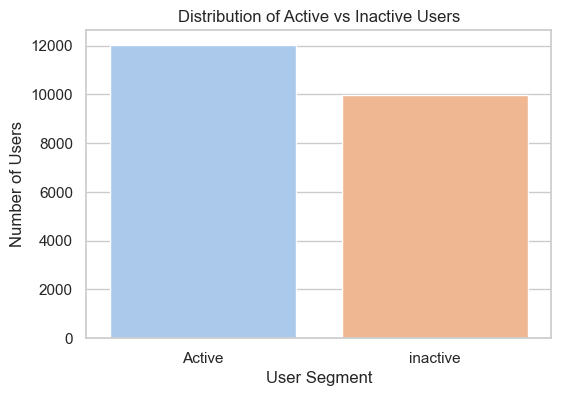

In [34]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Count of active vs inactive users
user_segment_counts = df['USER_SEGMENT'].value_counts()

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x=user_segment_counts.index, y=user_segment_counts.values, palette='pastel')
plt.title('Distribution of Active vs Inactive Users')
plt.ylabel('Number of Users')
plt.xlabel('User Segment')
plt.show()

In [35]:
# Count of active users per country
active_users_by_country = df[df['USER_SEGMENT'] == 'Active']['REGISTRATION_COUNTRY'].value_counts()

In [36]:
print(active_users_by_country)

REGISTRATION_COUNTRY
FIN    5451
DNK    4985
GRC    1532
NOR      13
EST      13
HUN       5
CZE       4
SWE       4
POL       4
ISR       3
LVA       3
GBR       2
FRA       2
LTU       2
CAN       1
DEU       1
HRV       1
CYP       1
ARE       1
Name: count, dtype: int64


C:\Users\New\AppData\Local\Temp\ipykernel_8100\545870127.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=active_users_by_country.index, y=active_users_by_country.values, palette='muted')


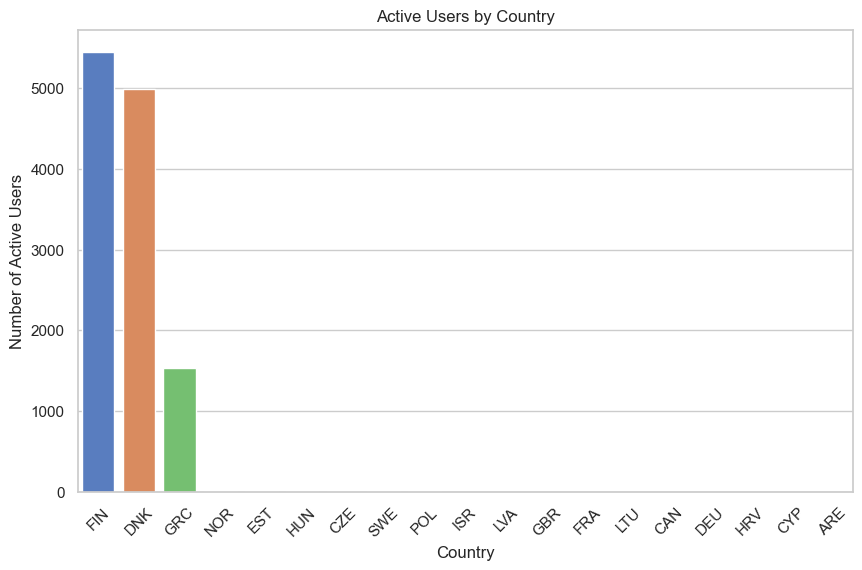

In [37]:
# Plotting Active Users by Country

plt.figure(figsize=(10, 6))
sns.barplot(x=active_users_by_country.index, y=active_users_by_country.values, palette='muted')
plt.title('Active Users by Country')
plt.ylabel('Number of Active Users')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

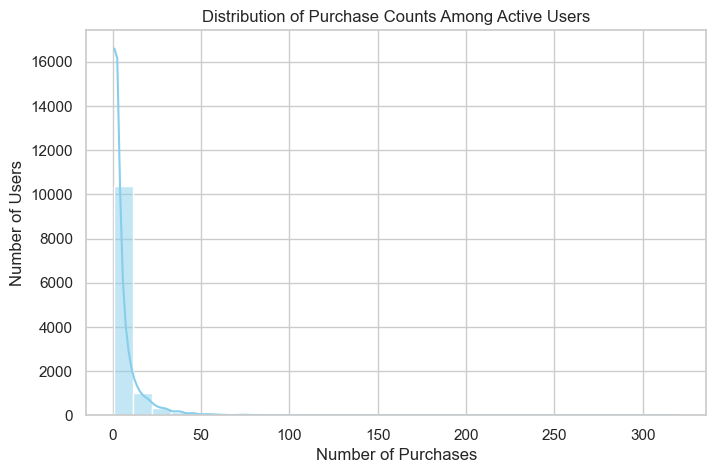

In [38]:
#Order Counts Among Active Users

#I am exploring the distribution of order counts among active users because this will help in understanding user purchasing behavior.

# Filtering active users
active_users = df[df['USER_SEGMENT'] == 'Active']

# Plotting the distribution of purchase counts
plt.figure(figsize=(8, 5))
sns.histplot(active_users['PURCHASE_COUNT'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Purchase Counts Among Active Users')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Users')
plt.show()

{'Web': 12708.0, 'Android': 25946.0, 'iOS': 34887.0}


C:\Users\New\AppData\Local\Temp\ipykernel_8100\1487807797.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(platform_usage.keys()), y=list(platform_usage.values()), palette='Set2')


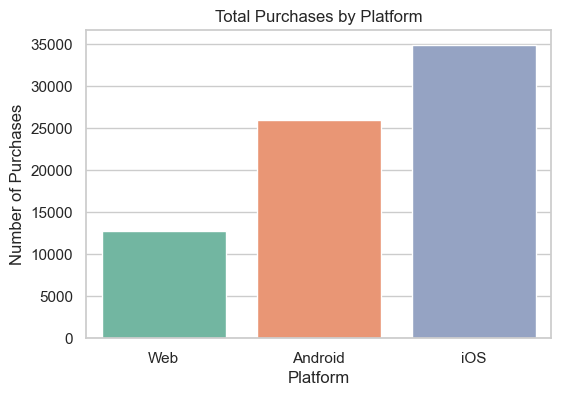

In [52]:
#Device/Platform Usage
#Understanding which platforms users prefer can guide platform-specific strategies.

# Sum of purchases by platform
platform_usage = {
    'Web': df['WEB_PURCHASES'].sum(),
    'Android': df['ANDROID_PURCHASES'].sum(),
    'iOS': df['IOS_PURCHASES'].sum()
}

print(platform_usage)

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x=list(platform_usage.keys()), y=list(platform_usage.values()), palette='Set2')
plt.title('Total Purchases by Platform')
plt.ylabel('Number of Purchases')
plt.xlabel('Platform')
plt.show()

{'Breakfast': 2333.0, 'Lunch': 28567.0, 'Dinner': 36433.0, 'Evening': 5935.0, 'Late Night': 0.0}


C:\Users\New\AppData\Local\Temp\ipykernel_8100\2438852911.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(time_of_day_purchases.keys()), y=list(time_of_day_purchases.values()), palette='coolwarm')


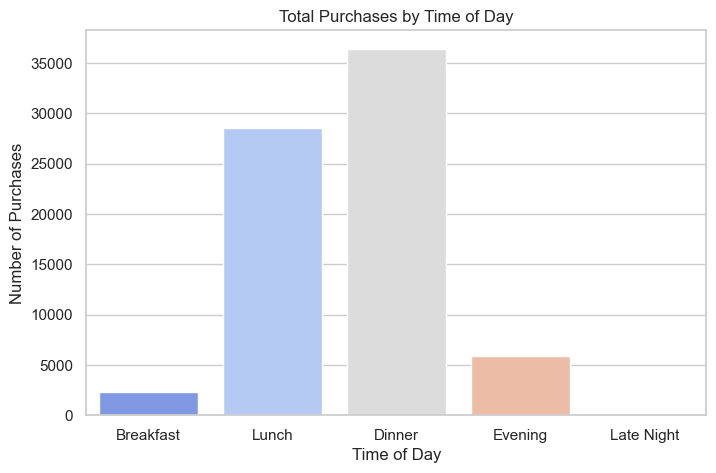

In [42]:
 #Order Distribution by Time of Day
#Analyzing when users place orders can inform marketing and operational strategies.

# Sum of purchases by time of day
time_of_day_purchases = {
    'Breakfast': df['BREAKFAST_PURCHASES'].sum(),
    'Lunch': df['LUNCH_PURCHASES'].sum(),
    'Dinner': df['DINNER_PURCHASES'].sum(),
    'Evening': df['EVENING_PURCHASES'].sum(),
    'Late Night': df['LATE_NIGHT_PURCHASES'].sum()
}

print(time_of_day_purchases)

# Plotting Total Purchases by Time of Day
plt.figure(figsize=(8, 5))
sns.barplot(x=list(time_of_day_purchases.keys()), y=list(time_of_day_purchases.values()), palette='coolwarm')
plt.title('Total Purchases by Time of Day')
plt.ylabel('Number of Purchases')
plt.xlabel('Time of Day')
plt.show()

In [44]:
#Key Business Metrics

#Active User Rate

#Below is the percentage of registered users who have placed at least one order

total_users = len(df)
active_users = df['IS_ACTIVE_USER'].sum()
active_user_rate = (active_users / total_users) * 100

print(total_users)
print(active_users)
print(active_user_rate)

21983
12028
54.715007050902976


In [ ]:
#Average Order Value (AOV)

# Filtering active users
active_users_df = df[df['IS_ACTIVE_USER']]

#total revenue and total orders
total_revenue = active_users_df['TOTAL_PURCHASE_VALUE_EUR'].sum()
total_orders = active_users_df['PURCHASE_COUNT'].sum()

# Computed AOV
average_order_value = total_revenue / total_orders

In [51]:
#Purchase Frequency
#This metric tells us, on average, how many orders an active user places. It’s a good indicator of user stickiness and how well the service is integrated into customers' routines.



# Filtered active users only
active_users_df = df[df['IS_ACTIVE_USER']]

# Total purchases made by active users
total_active_purchases = active_users_df['PURCHASE_COUNT'].sum()

# Total number of active users
num_active_users = active_users_df.shape[0]

# Purchase Frequency
purchase_frequency = total_active_purchases / num_active_users

print(total_active_purchases)
print(f"Purchase Frequency: {purchase_frequency:.2f} orders per active user")

73541
Purchase Frequency: 6.11 orders per active user


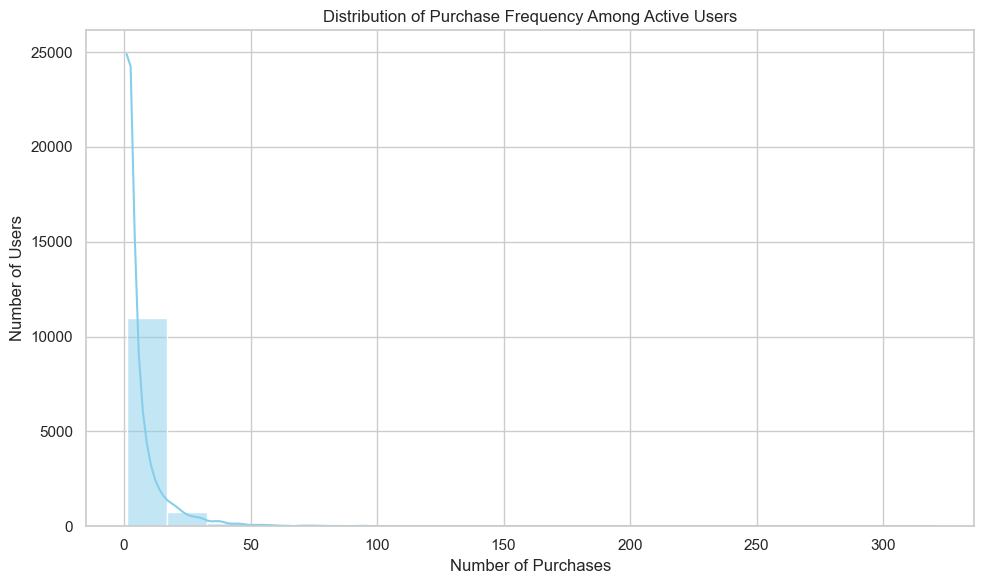

In [50]:
#Visualizing Purchase Frequency
#Since purchase frequency is a single value, I will also visualize its distribution across users to see variability

# Set plot style
sns.set(style='whitegrid')

# Histogram of purchase counts among active users
plt.figure(figsize=(10, 6))
sns.histplot(active_users_df['PURCHASE_COUNT'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Purchase Frequency Among Active Users')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()